# Categorical Mode Imputation

## Introduction

Categorical features in real-world datasets often contain missing values due to incomplete data entry, user omission, or system errors. Since categorical variables represent discrete labels rather than numerical magnitudes, statistical measures such as mean or median cannot be applied for imputation.

Mode Imputation is a simple and widely used technique where missing values are replaced with the most frequently occurring category in that feature.

This method assumes that the most common category is a reasonable estimate for the missing observations.

---

## Why Use Mode Imputation?

- Simple and easy to implement  
- Preserves dataset size (no row deletion)  
- Maintains consistency in category space  
- Works well when missing percentage is small  

---

## When to Use

- When missing values are minimal  
- When data is assumed to be Missing Completely At Random (MCAR)  
- When majority class dominance does not distort model performance  

---

### Import requirements 

In [23]:
import pandas as pd 
import numpy as np
import sklearn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [25]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
df.shape

(1460, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [28]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [29]:
# check the percentage of missing values 
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

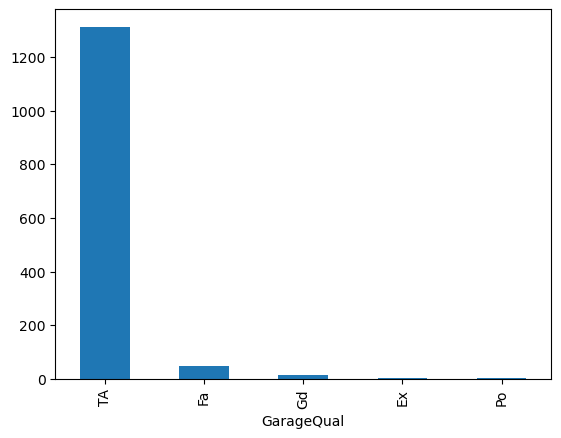

In [30]:
# Plot bar graph 
df['GarageQual'].value_counts().plot(kind='bar')
plt.show()

In [31]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

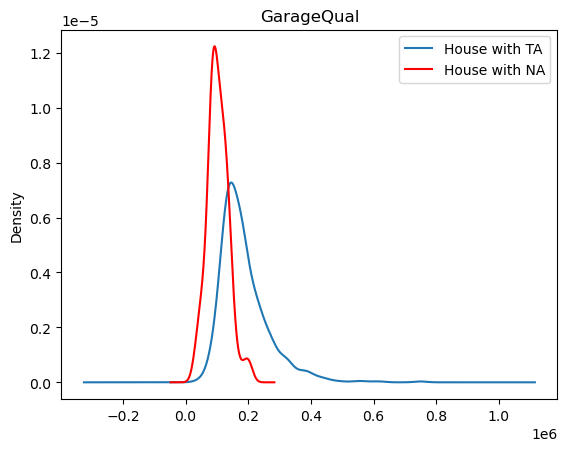

In [32]:
fig = plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,lables=ax.get_legend_handles_labels()
lables=['House with TA','House with NA']
ax.legend(lines,lables,loc='best')
plt.title('GarageQual')

In [33]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [34]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

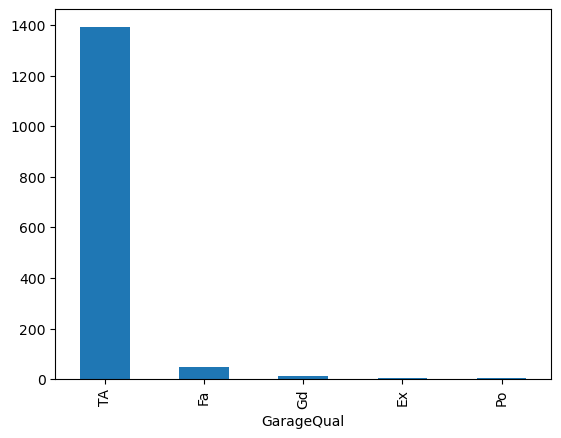

In [35]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

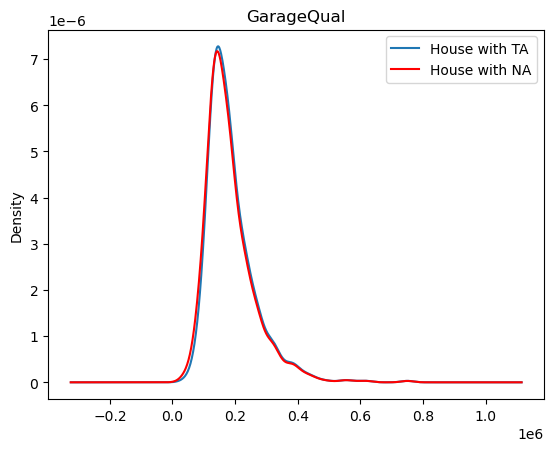

In [36]:
fig = plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,lables=ax.get_legend_handles_labels()
lables=['House with TA','House with NA']
ax.legend(lines,lables,loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

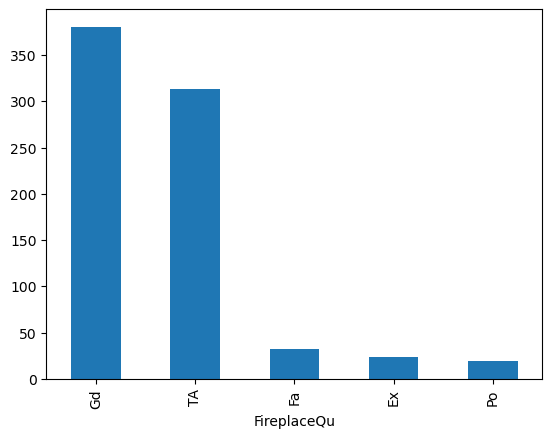

In [37]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [38]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

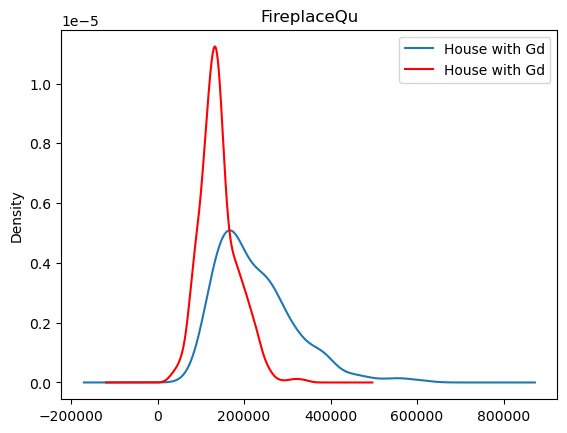

In [39]:
fig = plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,lables=ax.get_legend_handles_labels()
lables=['House with Gd','House with Gd']
ax.legend(lines,lables,loc='best')
plt.title('FireplaceQu')

In [40]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [41]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

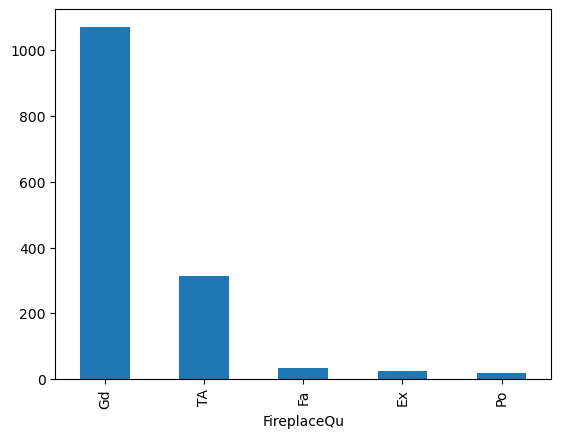

In [42]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

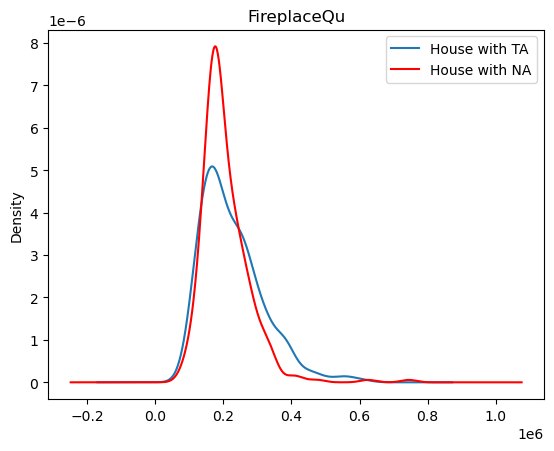

In [43]:
fig = plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,lables=ax.get_legend_handles_labels()
lables=['House with TA','House with NA']
ax.legend(lines,lables,loc='best')
plt.title('FireplaceQu')

## using Sklearn(Simpleimputer)

In [44]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)

(1168, 2)
(292, 2)


In [47]:
imputer=SimpleImputer(strategy='most_frequent')

In [48]:
X_train_transform=imputer.fit_transform(X_train)
X_test_transform=imputer.transform(X_test)

In [49]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)